# Problem Definition

-  Copy the file to your collaboratory
-  You need to:
-  write comments for all the cells
-  define a new network such that:
-  it has less than 20000 parameters
-  it achieves validation accuracy of more than 99.4% (basically print(score) should be more than 0.994
-  Once done, upload the link to your Github Project to LMS. 

### Mount the Drive on Collab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment3')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Installation of Necessary Python Packages

In [0]:
# https://keras.io/
# !pip install -q keras
# import keras

## Import ie load the necessary packages in to Memory so that we can use them in the program

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

## Load the Mnist Data  in to Training Set and Testing Set

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Display one row one datapoint from the Training Set. Each point is a handwritten Digit


# Size of Train Dataset and plot the first number on the graph
- The train dataset has input data which is stored in X_train
- X_train is an 3 dimensinal array which is storing 60 thousand numbers. Each number is of 28 x 28 of size i.e 28 rows and 28 columns

### Now plot the first number
- Among the 60000 thousand number fetch the frist number by calling X_train[0]
- the first number has 28 rows and 28 columns.
- plot the first number matplotlib. this is the library used to plot graphs
- plt.imshow function helps to show the graph on the screen

(60000, 28, 28)


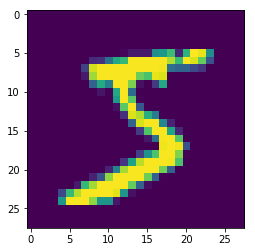

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## ## Reshape the 3 dimensional array to 4 dimensional Array

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Conver the Training data in to float and then normalize the data by dividing each point by 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Model Approach Training Till the Training Accuracy is more than 99.8 and then perform the testing onthe Test Data
## Parameters are 14,736



- ## Compiling the model 

- mentioning which Optimizer algorithm to be used to calculate the gradients

## Train the Model

- Pass the input data X_train
- Pass the output data y_Train
- Batch_size - 32. Each epoch is to cover all images one time. To do that the images goes in batches. For one epoch there will be multiple batches. Each batch will take 32 images.

- nb_epoch = 10. Train the model for 1000 epochs, stop it when you reach required accuracy

- Verbose - show the training log history for every epoch.



# Validate/ Test the Model

- After the model is trained we test the model by checking the predictions with y_test values. 
- Accuracy score is calculates by checking how many predictions are correct

keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)


 - #### padding='valid'  : No 



In [0]:
from keras.layers import Activation, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model = Sequential()

 
model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False, input_shape=(28,28,1)))  #26

model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False))     # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(32, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))      # 11, 11 

model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(10, (2,2), activation='relu',use_bias=False))          # 12x12, 10 layers

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=1000, verbose=1)


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 26, 26, 16)        144       
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 22, 22, 32)        4608      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 9, 9, 16)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1000
60000/60000 [==============================] - 26s 433us/step - loss: 0.2441 - acc: 0.9343
Epoch 2/1000
60000/60000 [==============================] - 25s 414us/step - loss: 0.0727 - acc: 0.9772
Epoch 3/1000
60000/60000 [==============================] - 25s 420us/step - loss: 0.0584 - acc: 0.9821
Epoch 4/1000
60000/60000 [==============================] - 25s 419us/step - loss: 0.0498 - acc: 0.9849
Epoch 5/1000
60000/60000 [==============================] - 25s 415us/step - loss: 0.0439 - acc: 0.9861
Epoch 6/1000
60000/60000 [==============================] - 25s 415us/step - loss: 0.0395 - acc: 0.9873
Epoch 7/1000
60000/60000 [==============================] - 25s 422us/step - loss: 0.0362 - acc: 0.9885
Epoch 8/1000
60000/60000 [==============================] - 25s 412us/step - loss: 0.0327 - acc: 0.9896
Epoch 9/1000
60000/60000 [==============================] - 25s 413us/step - loss: 0.0306 - acc: 0.9906
Epoch 10/1000
60000/60000 [==============================] - 25s

KeyboardInterrupt: ignored

## Saving the Weights for future reference

In [0]:
model.save_weights('weights_final.h5')

## Testing the Data and got an accuracy of 99.42

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

[0.030564815212788518, 0.9942]
[[6.61670805e-13 2.85207730e-12 6.61670805e-13 2.23151055e-12
  6.61670805e-13 6.61670805e-13 6.61670805e-13 1.00000000e+00
  6.61670805e-13 6.25286541e-12]
 [1.47115315e-08 3.25124871e-10 9.99999523e-01 3.11163443e-12
  3.11163443e-12 3.11163443e-12 4.78297295e-07 3.11163443e-12
  3.11163443e-12 3.11163443e-12]
 [1.27132343e-12 1.00000000e+00 1.27132343e-12 1.27132343e-12
  7.68470444e-12 1.27132343e-12 1.27132343e-12 2.50418575e-10
  1.27132343e-12 1.27132343e-12]
 [9.99999762e-01 9.85648022e-12 2.57024679e-11 9.85648022e-12
  9.85648022e-12 1.25399864e-11 2.03449375e-07 9.85648022e-12
  4.92463258e-11 9.85648022e-12]
 [9.81114226e-17 7.70791141e-16 9.81114226e-17 9.81114226e-17
  1.00000000e+00 9.81114226e-17 8.91514247e-16 9.81114226e-17
  9.81114226e-17 2.37592888e-12]
 [2.91953256e-13 1.00000000e+00 2.91953256e-13 2.91953256e-13
  6.83985583e-13 2.91953256e-13 2.91953256e-13 1.91590563e-11
  2.91953256e-13 2.91953256e-13]
 [2.12045832e-12 2.12045832

{'activation_12': <keras.layers.core.Activation at 0x7fe6556b6198>,
 'batch_normalization_1': <keras.layers.normalization.BatchNormalization at 0x7fe655dfb2e8>,
 'batch_normalization_2': <keras.layers.normalization.BatchNormalization at 0x7fe6556c94e0>,
 'conv2d_114': <keras.layers.convolutional.Conv2D at 0x7fe655dfb0f0>,
 'conv2d_115': <keras.layers.convolutional.Conv2D at 0x7fe655dfb0b8>,
 'conv2d_116': <keras.layers.convolutional.Conv2D at 0x7fe655dfb358>,
 'conv2d_117': <keras.layers.convolutional.Conv2D at 0x7fe655dfb940>,
 'conv2d_118': <keras.layers.convolutional.Conv2D at 0x7fe65579b6a0>,
 'conv2d_119': <keras.layers.convolutional.Conv2D at 0x7fe6556dd320>,
 'dropout_5': <keras.layers.core.Dropout at 0x7fe655dfb9e8>,
 'dropout_6': <keras.layers.core.Dropout at 0x7fe6556ddc50>,
 'flatten_12': <keras.layers.core.Flatten at 0x7fe6556dd7f0>,
 'max_pooling2d_35': <keras.layers.pooling.MaxPooling2D at 0x7fe6557e5358>,
 'max_pooling2d_36': <keras.layers.pooling.MaxPooling2D at 0x7fe65

## Loading the weights and retesting the model

In [0]:
model.load_weights('weights_final.h5')
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

[0.030564815212788518, 0.9942]
[[6.61670805e-13 2.85207730e-12 6.61670805e-13 2.23151055e-12
  6.61670805e-13 6.61670805e-13 6.61670805e-13 1.00000000e+00
  6.61670805e-13 6.25286541e-12]
 [1.47115315e-08 3.25124871e-10 9.99999523e-01 3.11163443e-12
  3.11163443e-12 3.11163443e-12 4.78297295e-07 3.11163443e-12
  3.11163443e-12 3.11163443e-12]
 [1.27132343e-12 1.00000000e+00 1.27132343e-12 1.27132343e-12
  7.68470444e-12 1.27132343e-12 1.27132343e-12 2.50418575e-10
  1.27132343e-12 1.27132343e-12]
 [9.99999762e-01 9.85648022e-12 2.57024679e-11 9.85648022e-12
  9.85648022e-12 1.25399864e-11 2.03449375e-07 9.85648022e-12
  4.92463258e-11 9.85648022e-12]
 [9.81114226e-17 7.70791141e-16 9.81114226e-17 9.81114226e-17
  1.00000000e+00 9.81114226e-17 8.91514247e-16 9.81114226e-17
  9.81114226e-17 2.37592888e-12]
 [2.91953256e-13 1.00000000e+00 2.91953256e-13 2.91953256e-13
  6.83985583e-13 2.91953256e-13 2.91953256e-13 1.91590563e-11
  2.91953256e-13 2.91953256e-13]
 [2.12045832e-12 2.12045832

{'activation_12': <keras.layers.core.Activation at 0x7fe6556b6198>,
 'batch_normalization_1': <keras.layers.normalization.BatchNormalization at 0x7fe655dfb2e8>,
 'batch_normalization_2': <keras.layers.normalization.BatchNormalization at 0x7fe6556c94e0>,
 'conv2d_114': <keras.layers.convolutional.Conv2D at 0x7fe655dfb0f0>,
 'conv2d_115': <keras.layers.convolutional.Conv2D at 0x7fe655dfb0b8>,
 'conv2d_116': <keras.layers.convolutional.Conv2D at 0x7fe655dfb358>,
 'conv2d_117': <keras.layers.convolutional.Conv2D at 0x7fe655dfb940>,
 'conv2d_118': <keras.layers.convolutional.Conv2D at 0x7fe65579b6a0>,
 'conv2d_119': <keras.layers.convolutional.Conv2D at 0x7fe6556dd320>,
 'dropout_5': <keras.layers.core.Dropout at 0x7fe655dfb9e8>,
 'dropout_6': <keras.layers.core.Dropout at 0x7fe6556ddc50>,
 'flatten_12': <keras.layers.core.Flatten at 0x7fe6556dd7f0>,
 'max_pooling2d_35': <keras.layers.pooling.MaxPooling2D at 0x7fe6557e5358>,
 'max_pooling2d_36': <keras.layers.pooling.MaxPooling2D at 0x7fe65

#--------------------END OF ASSIGNMENT 3----------------

- #### Note: Continuing the same notebook for Assignment 4, the code below is still inprogress for Assignment4

(60000, 28, 28)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 32)        4608      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 9,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 23s 385us/step - loss: 0.2090 - acc: 0.9416 - val_loss: 0.0808 - val_acc: 0.9737
Epoch 2/1000
60000/60000 [==============================] - 22s 371us/step - loss: 0.0689 - acc: 0.9786 - val_loss: 0.0377 - val_acc: 0.9873
Epoch 3/1000
60000/60000 [==============================] - 22s 365us/step - loss: 0.0544 - acc: 0.9836 - val_loss: 0.0380 - val_acc: 0.9871
Epoch 4/1000
60000/60000 [==============================] - 22s 370us/step - loss: 0.0455 - acc: 0.9864 - val_loss: 0.0367 - val_acc: 0.9884
Epoch 5/1000
60000/60000 [==============================] - 22s 371us/step - loss: 0.0407 - acc: 0.9871 - val_loss: 0.0297 - val_acc: 0.9900
Epoch 6/1000
60000/60000 [==============================] - 22s 362us/step - loss: 0.0360 - acc: 0.9888 - val_loss: 0.0322 - val_acc: 0.9895
Epoch 7/1000
60000/60000 [==============================] - 22s 368us/step - loss: 0.0336 - acc: 0.9891 

KeyboardInterrupt: ignored

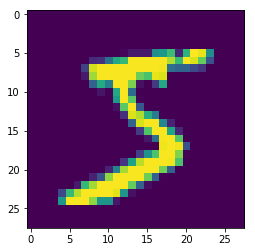

In [0]:


from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


y_train[:10]

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

from keras.layers import Activation, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Flatten

model = Sequential()

model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False, input_shape=(28,28,1)))  #26

model.add(Conv2D(16, (3, 3) , activation='relu',use_bias=False))     # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(32, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))      # 11, 11 

model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3,3), activation = 'relu', use_bias= False))   # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(10, (2,2), activation='relu',use_bias=False))          # 12x12, 10 layers

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=1000, verbose=1, validation_data=(X_test, Y_test))

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

[0.036095355841147606, 0.9933]
[[3.49206623e-12 3.49206623e-12 3.49206623e-12 3.49206623e-12
  3.49206623e-12 3.49206623e-12 3.49206623e-12 1.00000000e+00
  3.49206623e-12 3.49206623e-12]
 [1.20606411e-12 9.51203905e-14 1.00000000e+00 4.21583036e-15
  4.21583036e-15 4.21583036e-15 1.02455639e-11 4.21583036e-15
  4.21583036e-15 4.21583036e-15]
 [6.91294208e-15 1.00000000e+00 6.91294208e-15 6.91294208e-15
  7.46471114e-12 6.91294208e-15 7.21596177e-15 2.93267945e-11
  6.91294208e-15 6.91294208e-15]
 [1.00000000e+00 6.90816381e-17 6.90816381e-17 6.90816381e-17
  6.90816381e-17 4.44097839e-16 9.00082960e-12 6.90816381e-17
  3.37749102e-14 8.53838791e-17]
 [4.56599562e-19 4.56599562e-19 4.56599562e-19 4.56599562e-19
  1.00000000e+00 4.56599562e-19 4.56599562e-19 1.94526824e-18
  4.56599562e-19 1.05531003e-12]
 [2.07790853e-14 1.00000000e+00 2.07790853e-14 2.07790853e-14
  7.41501652e-12 2.07790853e-14 2.07790853e-14 4.28917700e-11
  2.07790853e-14 2.07790853e-14]
 [6.10081325e-15 2.35889081

{'activation_2': <keras.layers.core.Activation at 0x7f3841faf7f0>,
 'batch_normalization_5': <keras.layers.normalization.BatchNormalization at 0x7f3844a28be0>,
 'batch_normalization_6': <keras.layers.normalization.BatchNormalization at 0x7f3841ff0390>,
 'conv2d_13': <keras.layers.convolutional.Conv2D at 0x7f3844a281d0>,
 'conv2d_14': <keras.layers.convolutional.Conv2D at 0x7f3844a28da0>,
 'conv2d_15': <keras.layers.convolutional.Conv2D at 0x7f3844a18630>,
 'conv2d_16': <keras.layers.convolutional.Conv2D at 0x7f3844a8a208>,
 'conv2d_17': <keras.layers.convolutional.Conv2D at 0x7f38c7f036d8>,
 'conv2d_18': <keras.layers.convolutional.Conv2D at 0x7f3842003e48>,
 'dropout_5': <keras.layers.core.Dropout at 0x7f3844a8a1d0>,
 'dropout_6': <keras.layers.core.Dropout at 0x7f3841ff0d30>,
 'flatten_2': <keras.layers.core.Flatten at 0x7f3841fc9f60>,
 'max_pooling2d_5': <keras.layers.pooling.MaxPooling2D at 0x7f38449d89e8>,
 'max_pooling2d_6': <keras.layers.pooling.MaxPooling2D at 0x7f3841ff0320>}

In [0]:
from keras.layers import Activation, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dropout

model = Sequential()

 
model.add(Conv2D(32, (3, 3) , activation='relu',use_bias=False, input_shape=(28,28,1)))
model.add(Conv2D(60, (3, 3) , activation='relu',use_bias=False))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(10, 1, activation='relu',use_bias=False))
model.add(Conv2D(4, (3, 3) , activation='relu',use_bias=False))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, 5, activation='relu',use_bias=False))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=1000, verbose=1)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        288       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        17280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 60)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        600       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 4)         360       


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1000
60000/60000 [==============================] - 22s 373us/step - loss: 0.4694 - acc: 0.8372
Epoch 2/1000
60000/60000 [==============================] - 21s 344us/step - loss: 0.3187 - acc: 0.8775
Epoch 3/1000
60000/60000 [==============================] - 21s 345us/step - loss: 0.2980 - acc: 0.8824
Epoch 4/1000
60000/60000 [==============================] - 21s 343us/step - loss: 0.2870 - acc: 0.8859
Epoch 5/1000
60000/60000 [==============================] - 21s 342us/step - loss: 0.2815 - acc: 0.8876
Epoch 6/1000
60000/60000 [==============================] - 21s 344us/step - loss: 0.2764 - acc: 0.8886
Epoch 7/1000
60000/60000 [==============================] - 21s 344us/step - loss: 0.2733 - acc: 0.8900
Epoch 8/1000
60000/60000 [==============================] - 21s 344us/step - loss: 0.2705 - acc: 0.8899
Epoch 9/1000
60000/60000 [==============================] - 21s 350us/step - loss: 0.2692 - acc: 0.8906
Epoch 10/1000
60000/60000 [==============================] - 21s

KeyboardInterrupt: ignored

In [0]:
model.save_weights('weights_204_acc0_90.h5')

In [0]:
model.load_weights('weights_204_acc0_90.h5')
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=1000, verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/1000
60000/60000 [==============================] - 21s 354us/step - loss: 0.2336 - acc: 0.9001
Epoch 2/1000
60000/60000 [==============================] - 21s 342us/step - loss: 0.2347 - acc: 0.9000
Epoch 3/1000
60000/60000 [==============================] - 21s 343us/step - loss: 0.2342 - acc: 0.8999
Epoch 4/1000
60000/60000 [==============================] - 21s 346us/step - loss: 0.2321 - acc: 0.9004
Epoch 5/1000
60000/60000 [==============================] - 21s 342us/step - loss: 0.2335 - acc: 0.9000
Epoch 6/1000
60000/60000 [==============================] - 20s 341us/step - loss: 0.2353 - acc: 0.8996
Epoch 7/1000
60000/60000 [==============================] - 21s 342us/step - loss: 0.2319 - acc: 0.9006
Epoch 8/1000
60000/60000 [==============================] - 21s 342us/step - loss: 0.2341 - acc: 0.8999
Epoch 9/1000
60000/60000 [==============================] - 21s 342us/step - loss: 0.2336 - acc: 0.9000
Epoch 10/1000
60000/60000 [==============================] - 21s

KeyboardInterrupt: ignored

In [0]:
model.save_weights('weights_204_acc0_90.h5')

In [0]:
from keras import optimizers
model.load_weights('weights_204_acc0_90.h5')

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/30
60000/60000 [==============================] - 20s 333us/step - loss: 0.3314 - acc: 0.8814
Epoch 2/30
60000/60000 [==============================] - 19s 322us/step - loss: 0.2816 - acc: 0.8883
Epoch 3/30
60000/60000 [==============================] - 19s 321us/step - loss: 0.2712 - acc: 0.8904
Epoch 4/30
60000/60000 [==============================] - 19s 318us/step - loss: 0.2653 - acc: 0.8918
Epoch 5/30
60000/60000 [==============================] - 20s 327us/step - loss: 0.2642 - acc: 0.8921
Epoch 6/30
60000/60000 [==============================] - 19s 316us/step - loss: 0.2598 - acc: 0.8930
Epoch 7/30
60000/60000 [==============================] - 19s 322us/step - loss: 0.2600 - acc: 0.8932
Epoch 8/30
60000/60000 [==============================] - 19s 317us/step - loss: 0.2569 - acc: 0.8934
Epoch 9/30
60000/60000 [==============================] - 19s 319us/step - loss: 0.2583 - acc: 0.8932
Epoch 10/30
60000/60000 [==============================] - 19s 318us/step - loss: 

In [0]:
model.save_weights('weights_2_acc0_90.h5')
from keras import optimizers
model.load_weights('weights_2_acc0_90.h5')

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/30
60000/60000 [==============================] - 20s 326us/step - loss: 0.2381 - acc: 0.8989
Epoch 2/30
60000/60000 [==============================] - 19s 322us/step - loss: 0.2330 - acc: 0.9000
Epoch 3/30
60000/60000 [==============================] - 19s 321us/step - loss: 0.2332 - acc: 0.9004
Epoch 4/30
60000/60000 [==============================] - 19s 322us/step - loss: 0.2316 - acc: 0.9005
Epoch 5/30
60000/60000 [==============================] - 19s 320us/step - loss: 0.2312 - acc: 0.9007
Epoch 6/30
60000/60000 [==============================] - 20s 328us/step - loss: 0.2305 - acc: 0.9008
Epoch 7/30
60000/60000 [==============================] - 19s 322us/step - loss: 0.2302 - acc: 0.9010
Epoch 8/30
60000/60000 [==============================] - 19s 323us/step - loss: 0.2302 - acc: 0.9010
Epoch 9/30
60000/60000 [==============================] - 19s 318us/step - loss: 0.2293 - acc: 0.9011
Epoch 10/30
60000/60000 [==============================] - 19s 320us/step - loss: 

In [0]:
model.save_weights('weights_3_acc0_90.h5')
from keras import optimizers
model.load_weights('weights_3_acc0_90.h5')

sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/30
60000/60000 [==============================] - 20s 329us/step - loss: 0.2276 - acc: 0.9015
Epoch 2/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.2276 - acc: 0.9016
Epoch 3/30
60000/60000 [==============================] - 20s 330us/step - loss: 0.2273 - acc: 0.9017
Epoch 4/30
60000/60000 [==============================] - 19s 323us/step - loss: 0.2272 - acc: 0.9018
Epoch 5/30
60000/60000 [==============================] - 19s 324us/step - loss: 0.2274 - acc: 0.9017
Epoch 6/30
60000/60000 [==============================] - 19s 323us/step - loss: 0.2271 - acc: 0.9018
Epoch 7/30
60000/60000 [==============================] - 20s 326us/step - loss: 0.2274 - acc: 0.9018
Epoch 8/30
60000/60000 [==============================] - 19s 320us/step - loss: 0.2273 - acc: 0.9017
Epoch 9/30
60000/60000 [==============================] - 19s 323us/step - loss: 0.2272 - acc: 0.9018
Epoch 10/30
60000/60000 [==============================] - 19s 322us/step - loss: 

In [0]:
model.save_weights('weights_4_acc0_90.h5')
from keras import optimizers
model.load_weights('weights_4_acc0_90.h5')

sgd = optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/30
60000/60000 [==============================] - 19s 319us/step - loss: 0.2269 - acc: 0.9018
Epoch 2/30
60000/60000 [==============================] - 19s 310us/step - loss: 0.2273 - acc: 0.9018
Epoch 3/30
60000/60000 [==============================] - 19s 312us/step - loss: 0.2270 - acc: 0.9018
Epoch 4/30
60000/60000 [==============================] - 19s 312us/step - loss: 0.2268 - acc: 0.9019
Epoch 5/30
60000/60000 [==============================] - 19s 316us/step - loss: 0.2272 - acc: 0.9018
Epoch 6/30
60000/60000 [==============================] - 18s 305us/step - loss: 0.2271 - acc: 0.9017
Epoch 7/30
60000/60000 [==============================] - 18s 301us/step - loss: 0.2269 - acc: 0.9018
Epoch 8/30
60000/60000 [==============================] - 18s 301us/step - loss: 0.2272 - acc: 0.9018
Epoch 9/30
60000/60000 [==============================] - 18s 300us/step - loss: 0.2271 - acc: 0.9019
Epoch 10/30
60000/60000 [==============================] - 18s 301us/step - loss: 

In [0]:

# from keras.layers import Activation
# from keras.models import Sequential
# model = Sequential()
 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))
# model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_20 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_19 (Activation)   (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.



Epoch 1/10
60000/60000 [==============================] - 19s 325us/step - loss: 0.2068 - acc: 0.9397
Epoch 2/10
60000/60000 [==============================] - 14s 227us/step - loss: 0.0813 - acc: 0.9752
Epoch 3/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.0590 - acc: 0.9820
Epoch 4/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.0467 - acc: 0.9852
Epoch 5/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.0366 - acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.0286 - acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0244 - acc: 0.9921
Epoch 8/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0179 - acc: 0.9944
Epoch 9/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0157 - acc: 0.9950
Epoch 10/10
60000/60000 [==============================] - 13s 224us/step - loss:

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

[2.3211443702697756, 0.0859]
[[0.0928592  0.0960931  0.10382872 0.09565974 0.10498116 0.10170414
  0.09253392 0.11225241 0.11056384 0.08952373]
 [0.10105775 0.09820261 0.09634101 0.10257036 0.10445461 0.10440949
  0.09472025 0.10405599 0.09845711 0.09573079]
 [0.09302402 0.09611048 0.09977136 0.10008989 0.10312203 0.09961641
  0.09869093 0.10635718 0.10411512 0.09910258]
 [0.08741726 0.09869978 0.09041867 0.10686553 0.10564237 0.0996066
  0.08686195 0.11825424 0.11045969 0.09577385]
 [0.09576418 0.09840339 0.10134164 0.10170951 0.09111136 0.0979138
  0.09798665 0.11075181 0.10424168 0.10077593]
 [0.09239227 0.09794442 0.10230809 0.1003089  0.10341826 0.09930012
  0.09748819 0.10414305 0.10612267 0.09657409]
 [0.09405836 0.09673701 0.10585125 0.09798262 0.09944199 0.09696466
  0.09372951 0.10983273 0.11078255 0.09461939]
 [0.09656423 0.09616908 0.10178188 0.09394231 0.10289709 0.10704183
  0.09879257 0.10468765 0.09877507 0.09934827]
 [0.10354648 0.09263248 0.09586286 0.09807088 0.10462

{'activation_9': <keras.layers.core.Activation at 0x7fa55ad16cf8>,
 'conv2d_51': <keras.layers.convolutional.Conv2D at 0x7fa55acf5f60>,
 'conv2d_52': <keras.layers.convolutional.Conv2D at 0x7fa55acf5d30>,
 'conv2d_53': <keras.layers.convolutional.Conv2D at 0x7fa55acf5da0>,
 'flatten_9': <keras.layers.core.Flatten at 0x7fa55acfe7f0>}

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=1000, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/1000
60000/60000 [==============================] - 19s 312us/step - loss: 1.1536 - acc: 0.5400
Epoch 2/1000
60000/60000 [==============================] - 18s 296us/step - loss: 0.9682 - acc: 0.5967
Epoch 3/1000
60000/60000 [==============================] - 18s 298us/step - loss: 0.9545 - acc: 0.5996
Epoch 4/1000
60000/60000 [==============================] - 18s 293us/step - loss: 0.9473 - acc: 0.6010
Epoch 5/1000
60000/60000 [==============================] - 18s 298us/step - loss: 0.9427 - acc: 0.6020
Epoch 6/1000
60000/60000 [==============================] - 18s 296us/step - loss: 0.9386 - acc: 0.6029
Epoch 7/1000
60000/60000 [==============================] - 18s 297us/step - loss: 0.9358 - acc: 0.6035
Epoch 8/1000
60000/60000 [==============================] - 18s 301us/step - loss: 0.9327 - acc: 0.6038
Epoch 9/1000
60000/60000 [==============================] - 18s 306us/step - loss: 0.9319 - acc: 0.6044
Epoch 10/1000
60000/60000 [==============================] - 18s

KeyboardInterrupt: ignored

In [0]:
model.save_weights('weights215_acc60')

In [0]:
import os

In [0]:
os.getcwd()

'/content'

In [0]:
!ls

sample_data  weights215_acc60


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pwd

/content


In [0]:
!ls

drive  sample_data  weights_204_acc0_90  weights_204_acc0_90.h5


In [0]:
!cp weights_204_acc0_90.h5  /content/drive/My\ Drive

In [0]:
!cp weights215_acc60.h5 '/content/drive/My Drive'

cp: cannot stat 'weights215_acc60.h5': No such file or directory


In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored

In [0]:
from keras.layers import Activation
import keras
model = Sequential()


model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(24,(3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size = (2,2), strides= 1, padding='same'))

model.add(Conv2D(18, (1,1), activation='relu'))
model.add(Conv2D(16,(1,3), activation='relu' ))
model.add(Conv2D(14,(3,1), activation='relu' ))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2,  padding='same'))

model.add(Conv2D(18, (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 1,  padding='same'))


model.add(Conv2D(12,(3,3), activation='relu' ))
model.add(Dropout(0.33))

model.add(Convolution2D(10, 9))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

NameError: ignored

In [0]:
from keras.layers import Activation, MaxPooling2D
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 24))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 24, 24, 10)        330       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 1, 1, 10)          57610     
_________________________________________________________________
flatten_8 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total params: 62,740
Trainable params: 62,740
Non-trainable params: 0
_________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
